## BOOKS DATA

In [1]:
import os

os.chdir('..')

In [2]:
os.getcwd()

'q:\\AD project'

## START AND LAST PAGE

Contains the word Figure and less than 3 words, ignore

Satisfies and less than 50 words, then add to previous one

1. Strategic risk: None
2. Narrative and Numbers: -266
3. Little Book on Valuation: 17-
4. Investment Valuations techniques: None (Extract the first page data)
5. Investment Philosophies: -486
6. Investment Fables: None
7. Dark Side of Valuation: -794
8. Damodaran on Valuation: -1237
9. Corporate Finance Theory Practice: 
10. Applied corporate finance:  None

In [18]:
x = "hello there"
l = x.split(" ")
l[0].istitle()

False

In [134]:
import os
import json
from tqdm import tqdm
import re

books_folder = r"artifacts\book_hi_res"

def median(lst):
    lst.sort()
    return lst[len(lst)//2]

document_data = []
idxs = []
doc_update = 0
for book_name in tqdm(os.listdir(books_folder)):
    # print(book_name)
    curr_json_path = os.path.join(books_folder, book_name)
    if book_name.startswith("Corporate_Finance"): continue
    if book_name.startswith("Narrative"):
        start_page = 1
        end_page = 266
    elif book_name.startswith("Little"):
        start_page = 17
        end_page = None
    elif book_name.startswith("Investment_Philosophies"):
        start_page = 1
        end_page = 486
    elif book_name.startswith("Dark"):
        start_page = 1
        end_page = 794
    elif book_name.startswith("Damodaran"):
        start_page = 1
        end_page = 1237
    else:
        start_page = 1
        end_page = None
    
    #Load the data
    with open(curr_json_path, "r") as f:
        json_data = json.load(f)
    x_start = []
    for jd in json_data:
        x_start.append(jd['coordinates'][0][0])
    x_min = min(x_start)
    x_median = median(x_start)

    '''
    If in the same page, then if the x_coord is less than x_median and greater than x_min, then it is the start of a paragraph
    '''
    metadata_book_name = book_name.split(".")[0]
    curr_page = 1
    page_change_para_start = False
    same_page_para_start = False
    
    for idx,jd in enumerate(json_data):
        text_split_list = jd['text'].split(" ")
        num_words = len(text_split_list)
        x_coord = jd['coordinates'][0][0]
        page_num = jd['page_num']
        txt = jd['text']
        txt = re.sub("\. ",".\n",txt)
        if start_page == 1 and end_page == None:
            pass
        elif start_page>page_num:continue
        elif end_page is not None and end_page<page_num:continue

        # if x_median-10<=x_coord <= x_median+10 and text_split_list[0].istitle() and num_words>100:
        if x_median-10<=x_coord <= x_median+10 and text_split_list[0].istitle() and num_words>100:
            # if num_words>600:
            # if text_split_list[0].istitle() and num_words>500:
            document_data.append(
                {
                    "text": txt+"\n\n",
                }
            )
            page_coordinates = jd['coordinates'].copy()
            page_coordinates.insert(0,{"page_num":page_num})
            document_data[-1]["page_num_coordinates"] = [page_coordinates]
            document_data[-1]['book_source'] = metadata_book_name
            doc_update+=1
            # elif text_split_list[0].istitle() and num_words<=500:
            #     prev_idx = document_data[-1]
            #     # prev_idx['text'] = prev_idx['text'] + "\n\n"
            #     if prev_idx['text'].endswith("\n\n"): pass
            #     else: prev_idx['text'] = prev_idx['text'] + "\n\n"
            #     prev_idx['text'] = prev_idx['text'] + txt + "\n\n"
            #     page_coordinates = jd['coordinates'].copy()
            #     page_coordinates.insert(0,{"page_num":page_num})
            #     prev_idx["page_num_coordinates"].append(page_coordinates)
            #     doc_update+=1
            # else:
            #     prev_idx = document_data[-1]
            #     # prev_idx['text'] = prev_idx['text'] + "\n\n"
            #     prev_idx['text'] = prev_idx['text'][:-2] + txt + "\n\n"
            #     page_coordinates = jd['coordinates'].copy()
            #     page_coordinates.insert(0,{"page_num":page_num})
            #     prev_idx["page_num_coordinates"].append(page_coordinates)
            #     doc_update+=1
        else:
            prev_idx = document_data[-1]
            prev_idx['text'] = prev_idx['text'][:-2] + txt + "\n\n"
            page_coordinates = jd['coordinates'].copy()
            page_coordinates.insert(0,{"page_num":page_num})
            prev_idx["page_num_coordinates"].append(page_coordinates)
            doc_update+=1
    idxs.append(idx)
    # break

100%|██████████| 10/10 [00:00<00:00, 15.94it/s]


In [135]:
sum(idxs)

31405

In [136]:
doc_update

28891

In [137]:
# len(document_data)
document_data[-3]

{'text': 'For decades, risk management was viewed as a finance function, with the CFO playing the role of risk measurer, assessor and punisher (for those who crossed defined risk limits).\nIn keeping with this definition, risk management become focused entirely on risk assessment and risk hedging.\nThe elevation of strategic risk management or enterprise risk management in businesses, with its willingness to consider the upside of risk, has come with one unfortunate side cost.\nMany firms have a person or group in charge of risk management, given primary responsibility for coordinating and managing risk through the organization.\nWhile we applaud the recognition given to risk management, it has also led others in the firm, especially in the other functional areas, to think that the existence of a risk management group has relieved them of the responsibility of having to play a role in managing risk.\n\n',
 'page_num_coordinates': [[{'page_num': 405},
   [245.16940307617188, 260.3332510

In [138]:
def get_len(txt):
    return len(txt.split(" "))
text_len = [get_len(txt['text']) for txt in document_data]

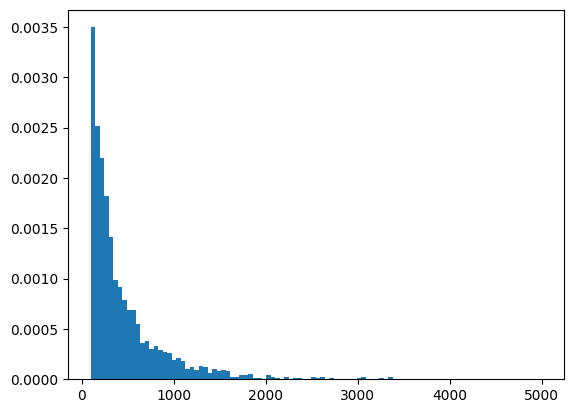

In [139]:
import matplotlib.pyplot as plt

plt.hist(text_len,density=True,bins=100);

In [140]:
sum(text_len)

1407494

In [141]:
min(text_len)

96

In [142]:
max(text_len)

4998

In [143]:
p = ""
for idx,doc_data in enumerate(document_data):
    if len(doc_data['text'].split(" "))==4998:
        # print(doc_data['text'],doc_data['book_source'])
        # print(document_data[idx-1])
        # print(len(document_data[idx-1]['text'].split(" ")))
        # print(len(document_data[idx-2]['text'].split(" ")))
        # break
        p = doc_data['text']
        # p+=1

In [144]:
   
# main_string = "Hello, hello, Hello, HELLO! , hello"
sub_string = "\n\n"
count_er=0
start_index=0
for i in range(len(p)):
  j = p.find(sub_string,start_index)
  if(j!=-1):
    start_index = j+1
    count_er+=1
print("Total occurrences are: ", count_er)

Total occurrences are:  1


In [121]:
import json
books_folder = r"artifacts\book_hi_res"

# for i in os.listdir(books_folder):
i = "Applied_corporate_finance.txt"

curr_json_path = os.path.join(books_folder, i)
with open(curr_json_path, "r") as f:
    json_data = json.load(f)
    # break

In [122]:
i = 0
x_start = []
start_page = 0
for jd in json_data:
    # if jd['page_num']>=start_page:
    print(jd['coordinates'][0][0],jd['coordinates'][2][0],jd['page_num'],jd['text'])
    print('-'*100)
    if i==150: break
    i+=1
    x_start.append(jd['coordinates'][0][0])

248.09210205078125 1459.0 2 Let me begin this preface with a confession of a few of my own biases. First, I believe that theory, and the models that flow from it, should provide us with the tools to understand, analyze and solve problems. The test of a model or theory then should not be based upon its elegance but upon its usefulness in problem solving. Second, there is little in corporate financial theory, in my view, that is new and revolutionary. The core principles of corporate finance are common sense ones, and have changed little over time. That should not be surprising. Corporate finance is only a few decades old and people have been running businesses for thousands of years, and it would be exceedingly presumptuous of us to believe that they were in the dark until corporate finance theorists came along and told them what to do. To be fair, it is true that corporate financial theory has made advances in taking common sense principles and providing them with structure, but these 

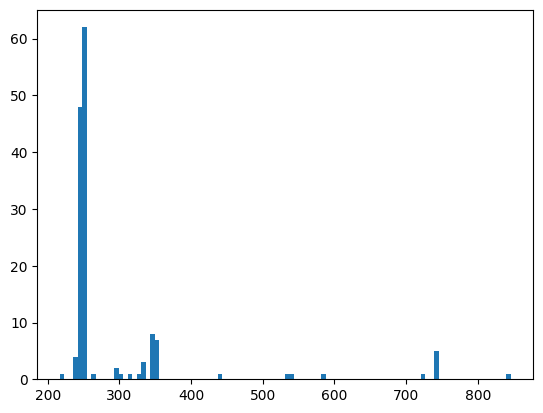

In [123]:
import matplotlib.pyplot as plt

plt.hist(x_start, bins=100);

In [124]:
max(x_start)

846.1065063476562

In [125]:
sum(x_start)/len(x_start)

292.96324635823555

In [126]:
min(x_start)

216.97471618652344

In [127]:
max(x_start)

846.1065063476562

In [128]:
#median of a list
def median(lst):
    lst.sort()
    return lst[len(lst)//2]

In [129]:
median(x_start)

250.66666666666666